# Explore here

In [1]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

In [2]:
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
total_data.shape #shape is not a method, no () necessary

(48895, 16)

In [4]:
total_data.info() # are there null values in the rows? Is the data numerical or categorical?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# NaN = object records, mixed data type, id is also categorical, numbers are used to identify hosts (categories), not to do operations/math with it
# categorical values range is limited (not continuous)
# if we want host id to be numerical, we can factorise it to be numerical

# Check for NaN/no values/duplicated values in columns we know we are going to use
# Check for null values in the dataset
null_values = total_data.isnull().sum()
# Print the columns with null values and their respective counts
print("Columns with null values:")
print(null_values[null_values > 0]) # display columns that have more than 0 null values (otherwise it is ok)

Columns with null values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [6]:
# When we have a lot of null values in an interesting column: fill in nulls with 0 or other values
# Null values can be very high, in that case drop the column
# If the null values don't overpower the rest of the data, keep them

# Converting the data to 0 etc is useful to visualise it 
# Before using the model, we need to revert the null values to NaN, so the model
# will not learn from the 0 but instead go over the NaN values

In [7]:
# Convert null values to something else:
# Fill null values with 0
total_data_filled_with_0 = total_data.fillna(0) # placeholder 0
# Alternative: fill null values with 1 : total_data_filled_with_1 = total_data.fillna(1)


In [8]:
null_values = total_data.isnull().sum()
print("Columns with null values:")
print(null_values[null_values > 0])
# no null values

Columns with null values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [9]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


In [10]:
# TO drop information/columns we do not need
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


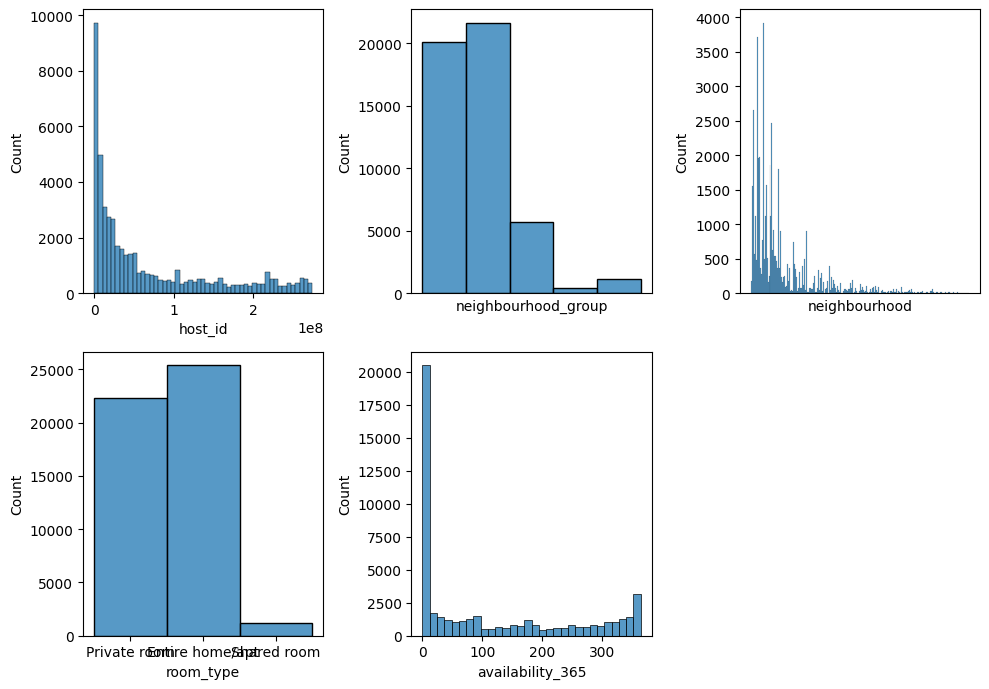

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

# General first look at the categorical data with plotting

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([]) # set_xticks removes tick marks indicating specific values on the x axis
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Also for numerical values we can do a general plotting, with for example boxplot or histograms

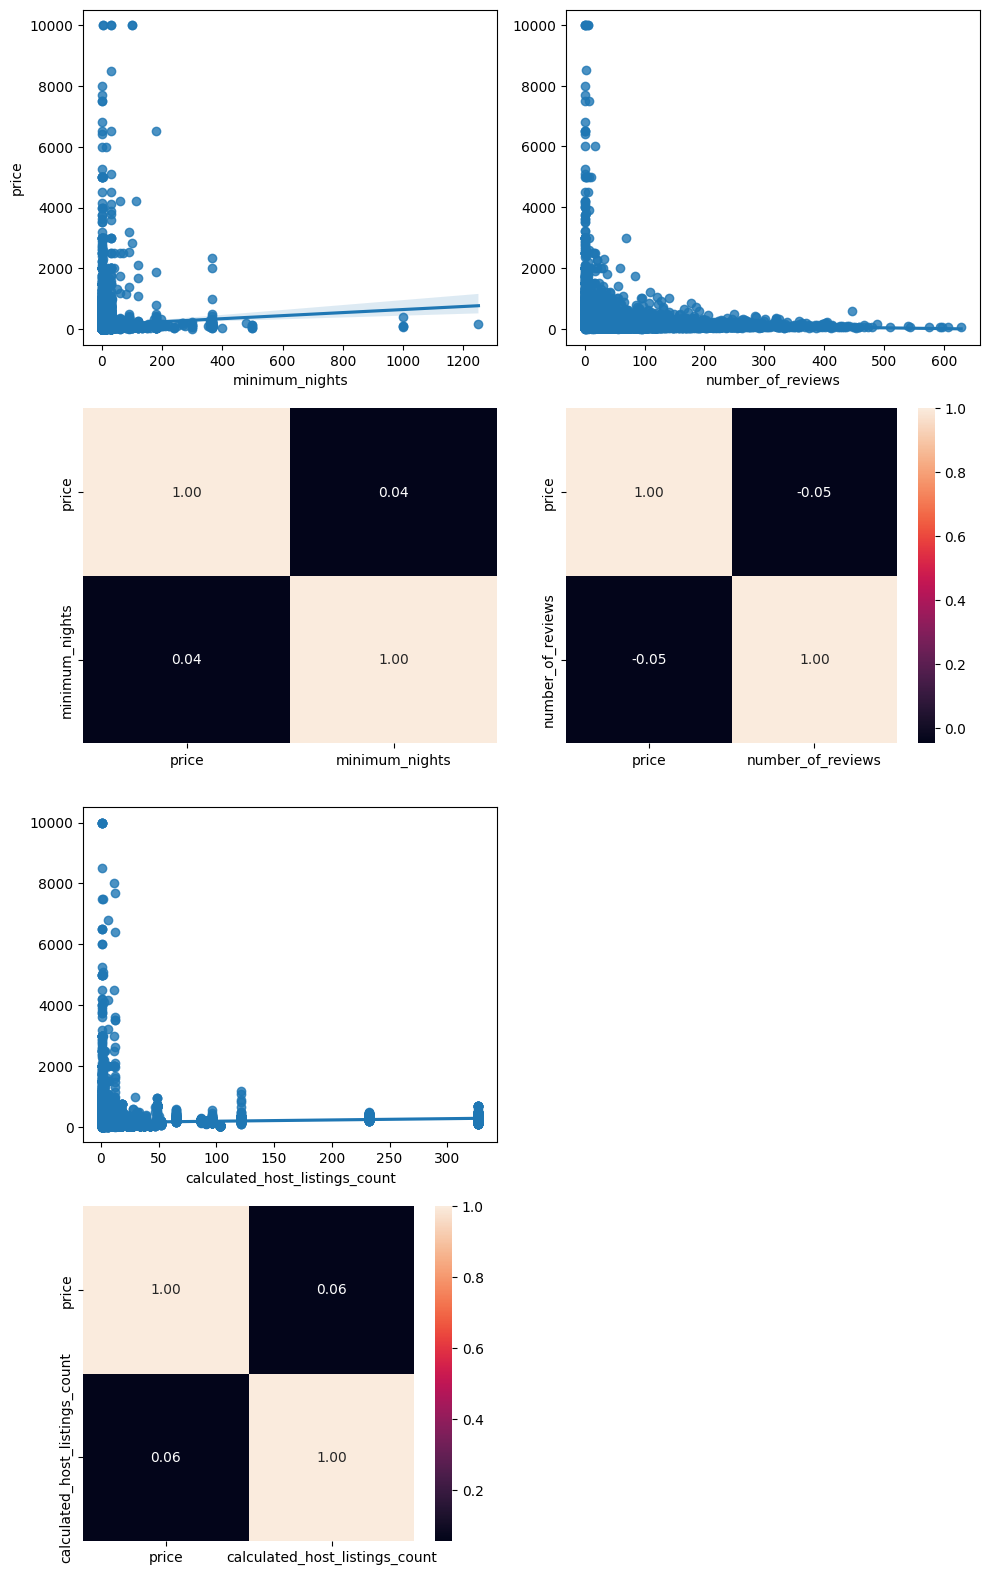

In [13]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price") # looks like a scatterplot, can be used to see if the data is a good fit for the linear regression model
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False) # annot -> to diplay numbers on the heatmap, fmt -> round to two decimal points, cbar = colourbar -> False not ot have it

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1]) # to take 2, 1 and 3, 1 empty graphs away

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

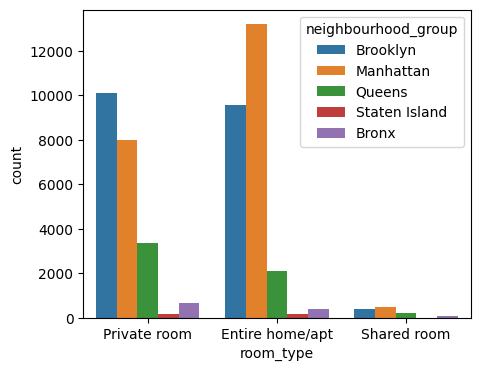

In [14]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

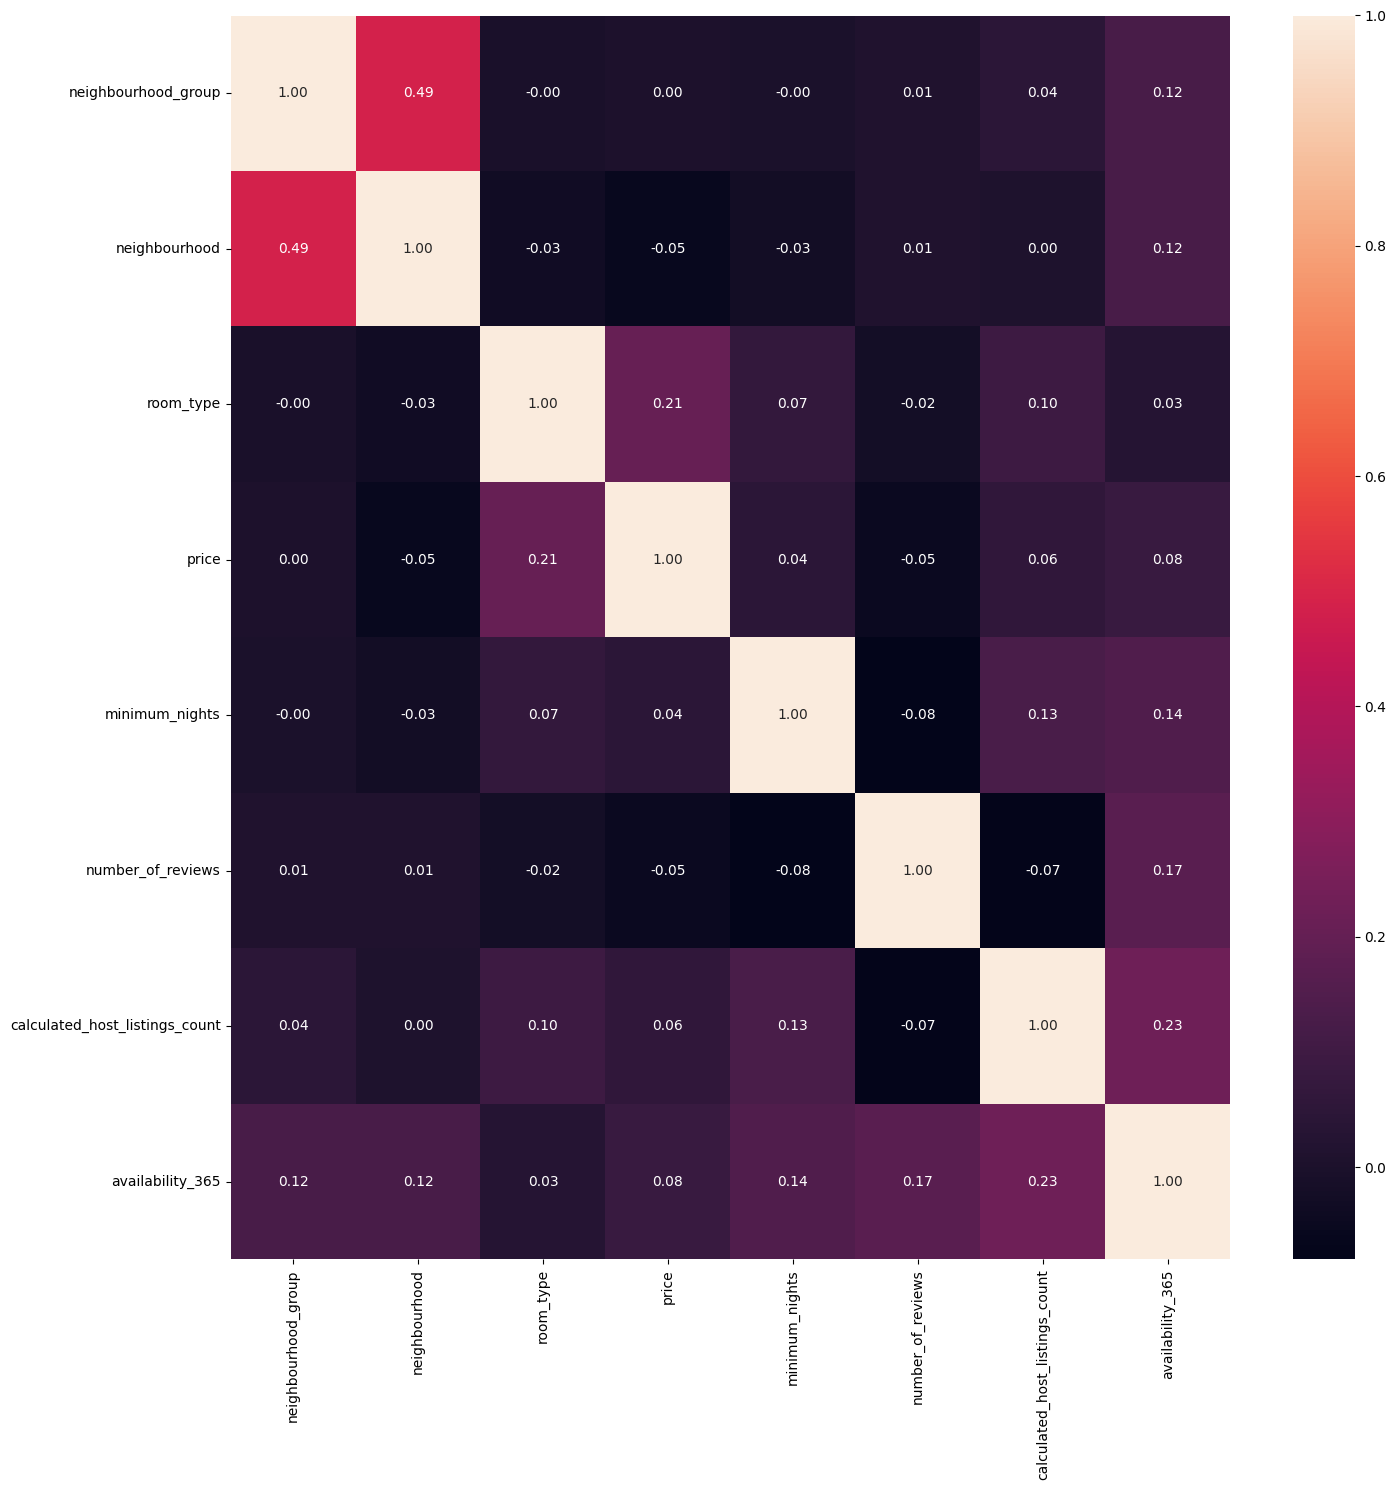

In [15]:
# Factorize the Room Type and Neighborhood Data, categorical -> numerical, but also data is in the same range
# Numerical data goes from 0 to 1, data is easier to correlate
total_data["room_type"] = pd.factorize(total_data["room_type"])[0] # always put [0] when factorizing
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout() # better layout/good practice, both for heatmaps and plots

# Draw Plot
plt.show()

In [16]:
total_data.describe() # gives general information about the statistics of the data
# mean: average. When we don't have values, we can fill in the spaces with values
# First calculate mean, then 
# Fill null values with the mean of each column
# total_data_filled = total_data.fillna(total_data.mean()) - .mean comes from pandas

# std: dispersion of data around the mean, how much variation from the mean
# The higher it is, the more spread out is the data (values)

# min: minimum value found in column

# 25%: e.g. for price column: 25% of data is below the value of 69.00

# max: maximum value foud in column

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [17]:
# Outlier: e.g. very different value and spread across
nights_stats = total_data["minimum_nights"].describe()
nights_stats
# count: how many values
# If we have an average of 7 and the std is 20: we have a 13 spread, so not too far away

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [18]:
#IQR = inter quartile range, measuring dispersion between quarters
nights_iqr = nights_stats["75%"] - nights_stats["25%"] # finding IQR, dspersion related to 50% of the data

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr 
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [19]:
total_data = total_data[total_data["minimum_nights"] <= 15]
# we take minimum_night values less than a value that is a little higher than 11 (upper limit outliers)
# we are "cleaning the outliers"


In [20]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]
# take minimum_nights column and check how many values 4 are there

print("Count of 0: ", count_0)
print("Count of 1: ", count_1) # how many airbnbs have a min 1 night stay
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12720
Count of 2:  11696
Count of 3:  7999
Count of 4:  3303


In [ ]:
total_data.isnull().sum().sort_values(ascending = False)
# check that there are no null values in the code, ascending is not very important

In [21]:
# Feature scaling: normalize a range of features in values from 0 and 1
# To bring values in the same range, getting the best features


from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
# transform each feature inbetween 0 and 1, not fitting a model
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
# takes scaled figures and converts them into a dataframe
df_scal["price"] = total_data["price"] # price is target variable
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.142857,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.642857,0.000000,0.000000,0.25,0.5,80


In [22]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4) # selecting 4 best features for predicting the target, feature selection technique
selection_model.fit(X_train, y_train) 
ix = selection_model.get_support() #getting 4 best features and saving them here
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
# creating a training dataframe containing only selected features
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.038156,0.000000,0.578082,0.0
1,0.011129,0.000000,0.000000,0.0
2,0.001590,0.000000,0.000000,0.0
3,0.011129,0.000000,0.060274,0.5
4,0.000000,0.018405,0.005479,1.0


In [ ]:
# To save the data

# X_train_sel["price"] = list(y_train)
# X_test_sel["price"] = list(y_test)
# X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
# saves data to csv file, good for reusability
# X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)